# Q) Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it.
***********

In [633]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.cluster import AgglomerativeClustering

In [634]:
# loading into python
data = pd.read_csv('Wine_clust.csv')

In [635]:
# display the first 5 rows of the dataframe
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [636]:
# Print information about the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### CHECKING FOR DUPLICATES

In [637]:
# display the rows having duplicates 
data[data.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


~ from the above display, no rows are having duplicate values

### CHECKING FOR NULL VALUES

In [638]:
# count of null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

~ from the above display, no null values are found.

In [639]:
# number of rows and columns of the dataframe 
data.shape

(178, 13)

 ~It is having 178 rows and 13 columns

In [640]:
# display summary statistics of all numerical columns
data.describe() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [641]:
# filtering out numerical features and displaying it
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
numerical_features

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

In [642]:
# displaying unique values in numerical features and displaying it
for i in numerical_features:
    print(f"{i} column \n")    
    nuni = data[i].nunique()
    print(f"Count of unique values = {nuni}\n")    
    uni = data[i].unique()
    print(f"Unique values = {uni}\n\n\n")    

Alcohol column 

Count of unique values = 126

Unique values = [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]



Malic_Acid column 

Count of unique values = 133

Unique values = [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8 

### OUTLIER

~ checking outliers for all numerical features

##### Outliers in numerical features

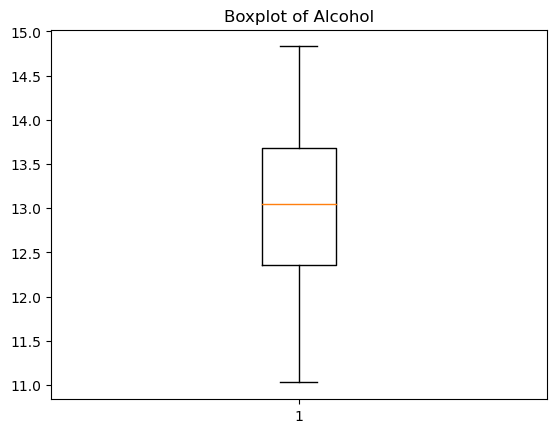

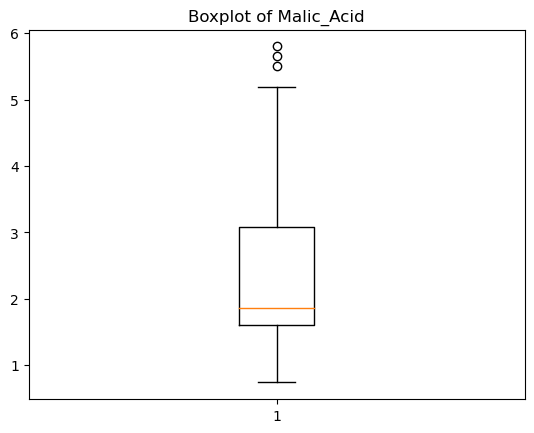

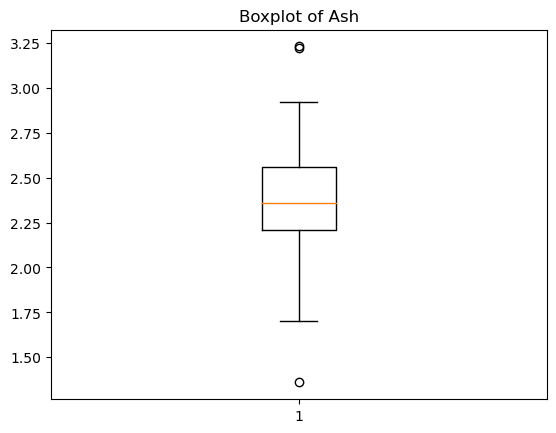

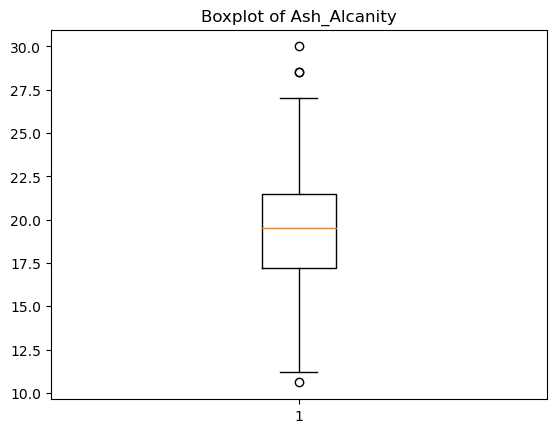

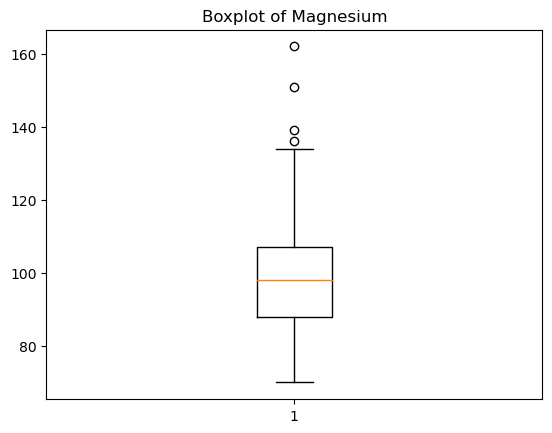

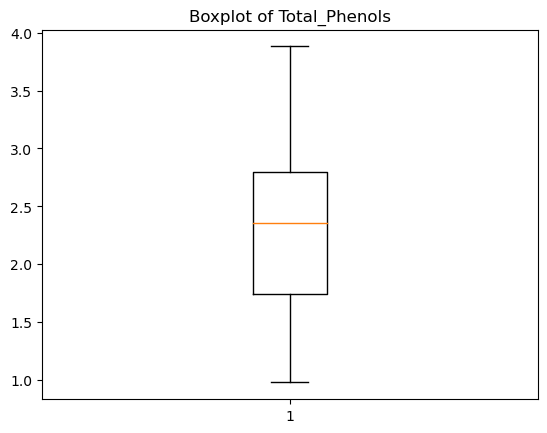

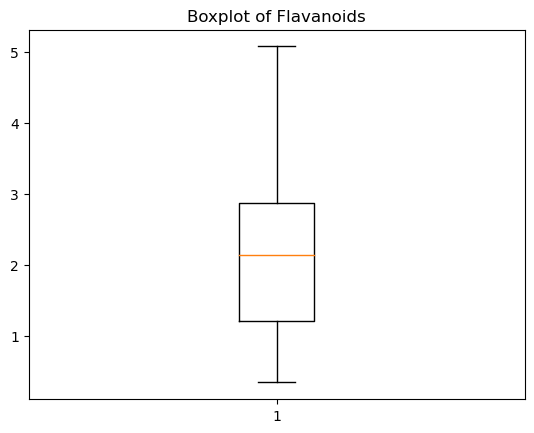

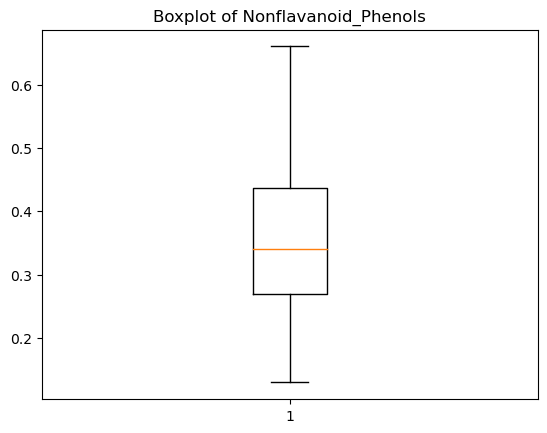

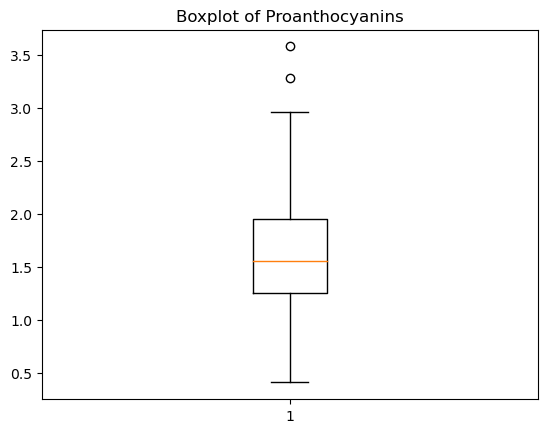

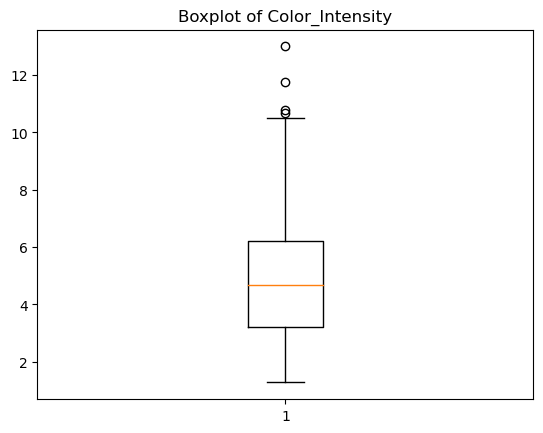

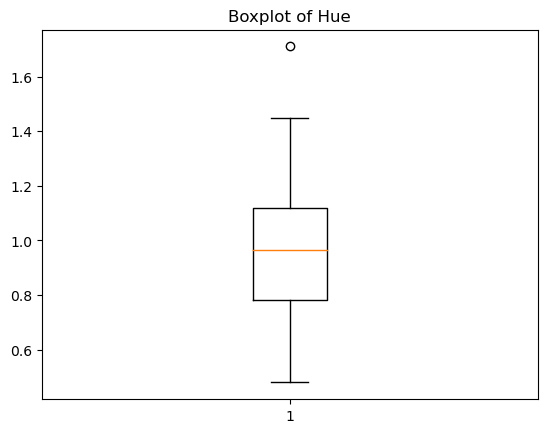

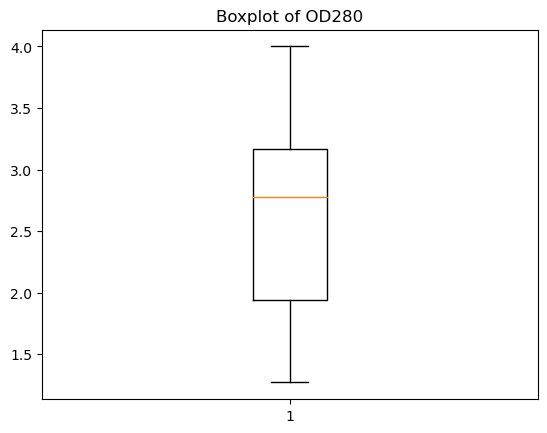

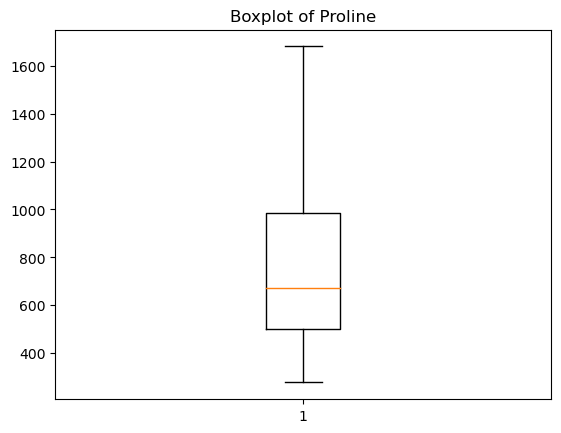

In [643]:
# boxplot of numerical features
for i in numerical_features:
    
    # boxplot of columns
    plt.boxplot(data[i])
    text = "Boxplot of"
    
    # display title
    plt.title(text+" "+i)
    plt.show()

~ from the above boxplots, outliers are found in Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, Hue columns

In [644]:
# display outliers present in numerical features
for i in numerical_features:
    
    # display column name
    print(f"{i} column\n")
    
    # display first quartile
    Q1_i = np.percentile(data[i], 25, interpolation='midpoint')
    print(f"First Quartile = {Q1_i}")
    
    # display second quartile
    Q2_i = np.percentile(data[i], 50, interpolation='midpoint')
    print(f"Second Quartile = {Q2_i}")
    
    # display third quartile
    Q3_i = np.percentile(data[i], 75, interpolation='midpoint')
    print(f"Third Quartile = {Q3_i}")
    
    # display interquartile range
    IQR_i =  Q3_i-Q1_i
    print(f"IQR = {IQR_i}")
    
    # display lower whisker
    low_i = Q1_i-1.5*IQR_i
    print(f"lower whisker = {low_i}")
    
    # display upper whisker
    up_i = Q3_i+1.5*IQR_i
    print(f"upper whisker = {up_i}\n")
    
    # display outliers in columns
    outlier_i = [] 
    for x_i in data[i]:
        if((x_i > up_i) or (x_i < low_i)):
            outlier_i.append(x_i) 
    print(f"Outliers = {outlier_i}\n\n\n")
        

Alcohol column

First Quartile = 12.364999999999998
Second Quartile = 13.05
Third Quartile = 13.675
IQR = 1.3100000000000023
lower whisker = 10.399999999999995
upper whisker = 15.640000000000004

Outliers = []



Malic_Acid column

First Quartile = 1.605
Second Quartile = 1.8650000000000002
Third Quartile = 3.065
IQR = 1.46
lower whisker = -0.585
upper whisker = 5.255

Outliers = [5.8, 5.51, 5.65]



Ash column

First Quartile = 2.21
Second Quartile = 2.36
Third Quartile = 2.5549999999999997
IQR = 0.34499999999999975
lower whisker = 1.6925000000000003
upper whisker = 3.0724999999999993

Outliers = [3.22, 1.36, 3.23]



Ash_Alcanity column

First Quartile = 17.2
Second Quartile = 19.5
Third Quartile = 21.5
IQR = 4.300000000000001
lower whisker = 10.749999999999998
upper whisker = 27.950000000000003

Outliers = [10.6, 30.0, 28.5, 28.5]



Magnesium column

First Quartile = 88.0
Second Quartile = 98.0
Third Quartile = 107.0
IQR = 19.0
lower whisker = 59.5
upper whisker = 135.5

Outliers =

### CORRELATION

In [645]:
# Correlation performed on numerical features
P = data[numerical_features]

In [646]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### SCALING


In [647]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1)) 

In [648]:
# Fit MinMaxScaler() and tranform the values 
X1 = minmax.fit_transform(data)

# display the values of X1
X1

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [649]:
# converting back to a dataframe since it is in array format
X2 = pd.DataFrame(X1, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
X2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


### CLUSTERING MODELS

#### 1) Kmeans Clustering

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


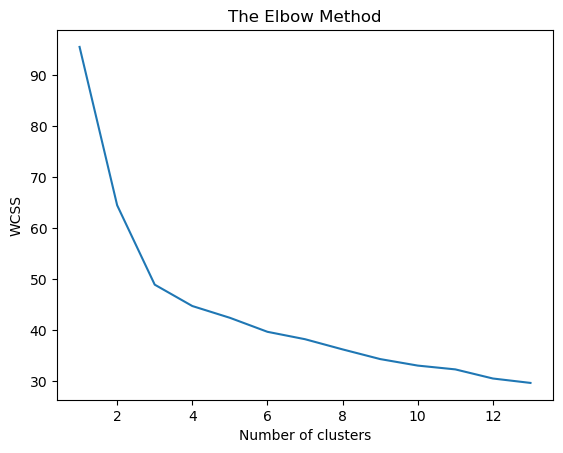

In [650]:
# empty list
wcss = [] 

# defining range of values from 1 to 13
for i in range(1,14): 
    
    # creating instance with each number of clusters, selecting initialization method as k-means++ to overcome random initialistaion trap
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    
    # fitting the data to the instance of the model
    kmeans.fit(X2)
    
    # calculation of wcss value and storing it in the list
    wcss.append(kmeans.inertia_) 
    
# plotting wcss values against number of clusters
plt.plot(range(1,14), wcss)

# display title
plt.title('The Elbow Method')

# display label on x-axis
plt.xlabel('Number of clusters')

# display label on y-axis
plt.ylabel('WCSS')

# display figure
plt.show()

~ optimum number of clusters = 3

In [651]:
# create K-Means model with 3 clusters 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) 

# predict the data points belong to which cluster
y_kmeans = kmeans.fit_predict(X2)

In [652]:
# evaluation metrics using silhouette score
sil_score = silhouette_score(X2, y_kmeans)
sil_score

0.3008938518500134

~ Above Silhouette score is greater than 0 which indicates the distance between the clusters is not significant.

#### 2) dB scan Clustering

~ find an optimal value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results.

In [653]:
# creating instance to calculate the distance from each point to its closest neighbour using the NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)

# fitting the data
nbrs = neigh.fit(X1)

# returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.
distances, indices = nbrs.kneighbors(X1)

In [654]:
# returns two arrays
nbrs.kneighbors(X1)

(array([[0.        , 0.26963979],
        [0.        , 0.38370121],
        [0.        , 0.38095169],
        [0.        , 0.38402824],
        [0.        , 0.3829089 ],
        [0.        , 0.30122825],
        [0.        , 0.27948115],
        [0.        , 0.39094993],
        [0.        , 0.38926779],
        [0.        , 0.22120233],
        [0.        , 0.30135389],
        [0.        , 0.23991191],
        [0.        , 0.23991191],
        [0.        , 0.47553396],
        [0.        , 0.42336175],
        [0.        , 0.25393672],
        [0.        , 0.26663321],
        [0.        , 0.26663321],
        [0.        , 0.31562649],
        [0.        , 0.35333565],
        [0.        , 0.26963979],
        [0.        , 0.39253997],
        [0.        , 0.26895165],
        [0.        , 0.27551174],
        [0.        , 0.26581584],
        [0.        , 0.3829089 ],
        [0.        , 0.27524462],
        [0.        , 0.27793996],
        [0.        , 0.36914925],
        [0.   

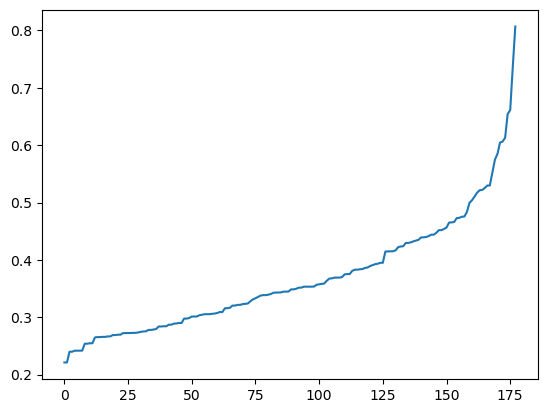

In [655]:
# sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

~ The optimal value for epsilon will be found at the point of maximum curvature =0.5

~ Outliers should make up <= 5 % of the total observations. Hence adjusting the model parameters like eps and min_samples accordingly

In [656]:
# deploy the DBSCAN algorithm with the value of eps=0.6 and 3 as the minimum number of samples in a cluster.
db = DBSCAN(eps=0.6, min_samples=3).fit(X1)

In [657]:
# storing labels
labels = db.labels_

In [658]:
# display results
outliers = pd.DataFrame(X1)

# display labels with their count
print(Counter(db.labels_))

# display outliers
print("\n Outliers\n")
print(outliers[db.labels_ ==-1])

Counter({0: 168, -1: 7, 1: 3})

 Outliers

           0         1         2         3         4         5         6   \
59   0.352632  0.039526  0.000000  0.000000  0.195652  0.344828  0.048523   
73   0.515789  0.183794  0.663102  1.000000  0.750000  0.800000  0.537975   
96   0.205263  0.272727  0.737968  0.561856  0.695652  0.213793  0.137131   
110  0.113158  0.592885  0.245989  0.458763  0.402174  0.758621  0.472574   
115  0.000000  0.152174  0.449198  0.561856  0.163043  0.510345  0.386076   
121  0.139474  0.258893  1.000000  0.922680  0.532609  0.758621  1.000000   
124  0.221053  0.705534  0.550802  0.536082  0.130435  0.648276  0.567511   

           7         8         9         10        11        12  
59   0.283019  0.003155  0.057167  0.463415  0.201465  0.172611  
73   0.150943  0.488959  0.176621  0.674797  0.816850  0.504280  
96   0.018868  0.362776  0.104096  0.382114  0.362637  0.247504  
110  0.207547  1.000000  0.138225  0.219512  0.564103  0.202568  
115  0.735

In [659]:
# creating a numpy array core_samples_mask having the same dimensions as the labels with all values set to false by default
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [660]:
# setting core and border points (all points that are not -1) to True
core_samples_mask[db.core_sample_indices_] = True

In [661]:
# store the label values of all the data points in labels array.
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

~ There are a total of three values in the labels array : 0, 1 and -1 . The values 0 and 1 refer to the two clusters made out of the data whereas -1 is the label given to those data points whose core sample points do not match those in the centers.

In [662]:
# number of clusters in labels.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

# number of outliers
n_noise_ = list(labels).count(-1)

In [663]:
# display the number of clusters and number of outliers
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of outliers: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of outliers: 7


In [664]:
# display unique labels
unique_labels = set(labels)
unique_labels

{-1, 0, 1}

In [665]:
# defining colors in a list
colors = ['y', 'b', 'g']
print(colors)

['y', 'b', 'g']


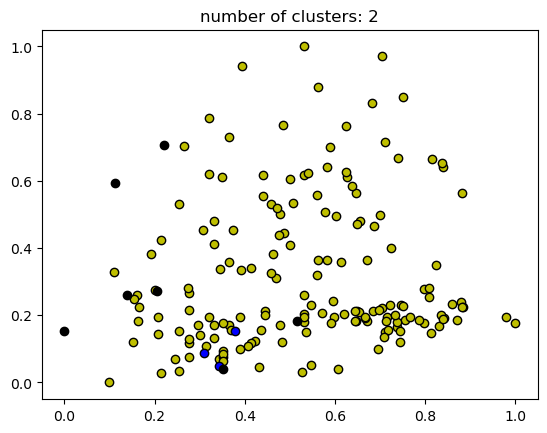

In [666]:
# plotting clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        # if label == -1, black used for outliers.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
  
    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
# display title
plt.title('number of clusters: %d' % n_clusters_)

# display figure
plt.show()

In [667]:
# evaluation metrics using silhouette score
sc = silhouette_score(X1, labels)
print("Silhouette score:%0.2f"%sc)

Silhouette score:0.13


~ Above Silhouette score is greater than 0 which indicates the distance between the clusters is not significant.

#### 3) Agglomerative Hierarchial Clustering

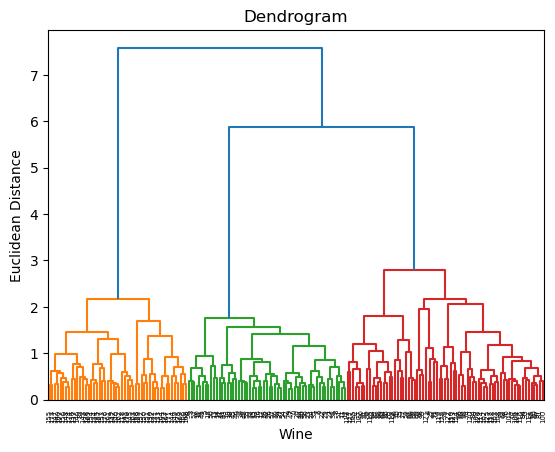

In [668]:
# creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(X2, method = 'ward'))

# display title
plt.title('Dendrogram')

# display label on x-axis
plt.xlabel('Wine')

# display label on y-axis
plt.ylabel('Euclidean Distance')

# display figure
plt.show()

~ number of clusters = 3

In [669]:
# creating instance for Agglomerative Hierarchial Clustering using number of clusters as 3 and distance as 'euclidean' 
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# predict the data points belong to which cluster
y_hc = hc.fit_predict(X2)

In [670]:
# display the clusters for each data points
y_hc

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [671]:
# evaluation metrics using silhouette score
sil_score = silhouette_score(X2, y_hc)
sil_score

0.29482906321585417

~ Above Silhouette score is greater than 0 which indicates the distance between the clusters is not significant.

**CLUSTERING MODELS**    
*****************     

1) Kmeans, Number of clusters = 3, Silhouette score = 0.3008938518500134

2) dB scan, Number of clusters = 2, Silhouette score = 0.13

3) Agglomerative Hierarchial Clustering, Number of clusters = 3, Silhouette score = 0.29482906321585417 
